## FIFA 22
FIFA22 statistics for each football player

### Context
FIFA has been a game that is played by many people across the globe and has come up with many many editions. It was relased in October this year i.e. FIFA 2021. This data set contains the data of the players in game.

### Content
This dataset contains data of players their rating, their age, their nationality, the position that they play,their potential for growth and other attributes in game

The dataset is prepared by me by the method of web scraping in https://sofifa.com/

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of  Columns in Both Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Start ID from 0 in dataframe</a></li>
      <li><a href="#part3-2">3.2 Remove leading and trailing characters in "Full_Name" and "Name" columns of dataframe</a></li>
      <li><a href="#part3-3">3.3 Define function to show all values in the table</a></li>
      <li><a href="#part3-4">3.4 Define a function to convert value value as a number format in the dataframe</a></li>
      <li><a href="#part3-5">3.5 Define a function to show radar chart</a></li>
      <li><a href="#part3-6">3.6 Define funtions to show images in the Figure</a></li>
      <li><a href="#part3-7">3.7 Defining drawnestedpiegraph function to show nested pie graph</a></li>
      <li><a href="#part3-8">3.8 Define funtions to show country flag in Bar Graph</a></li>  
      <li><a href="#part3-9">3.9 Order dataframe by Best Overall Rating column by descending</a></li>
      <li><a href="#part3-10">3.10 Remove null values from dataframe by rows</a></li>  
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Draw a Correlation Matrix</a></li>
      <li><a href="#part4-2">4.2 Draw a Graph showing top 20 players by Best Overall Rating</a></li>
      <li><a href="#part4-3">4.3 Draw a Graph showing top 20 team by averange Best Overall Rating</a></li>
      <li><a href="#part4-4">4.4 Draw a Graph showing number of player by their nationalities in World Map</a></li>
      <li><a href="#part4-5">4.5 Draw a Figure to show the top 20 number of nationality by the count of player</a></li>
      <li><a href="#part4-6">4.6 Draw a Figure to show the top overall 3 player by the features of radar chart</a></li>
      <li><a href="#part4-6">4.6 Draw a Figure to show the top overall 3 player by the features of radar chart</a></li>
      <li><a href="#part4-7">4.7 Draw a Figure to show the specturum of players' age and Best Overall Rating by their positions</a></li>
      <li><a href="#part4-8">4.8 Draw a Figure to show the top most valuable players</a></li>
      <li><a href="#part4-9">4.9 Define a nested pie graph to determine which prefered feet were used from players in terms of their position</a></li>
      <li><a href="#part4-10">4.10 Draw WorldCloud showing all players' names</a></li>  
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg
from io import BytesIO
import six

%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [25]:
file_location_url = "files/fifa_2022_data.csv";

fifa22_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8", low_memory=False,sep = ',')

3 - Deterime how many rows and columns are defined in dataframe

In [26]:
row_count = fifa22_df.shape[0]
column_count = fifa22_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 16800 , Column : 37


4 - Show first 5 values of dataframe

In [27]:
fifa22_df.head()

,Unnamed: 0,ID,Name,Full_Name,picture,Flag,Age,Position,Overall,Potential,...,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Aggression,Positioning,Defensive Awareness,Best Overall Rating
0,0,253755,Talles Magno,Talles Magno Bacelar Martins,https://cdn.sofifa.com/players/253/755/22_60.png,https://cdn.sofifa.com/flags/br.png,19,LM,67,85,...,64.0,70.0,65.0,61.0,58.0,69.0,38.0,56.0,20.0,68
1,1,246618,A. Hložek,Adam Hložek,https://cdn.sofifa.com/players/246/618/22_60.png,https://cdn.sofifa.com/flags/cz.png,18,ST,76,87,...,76.0,78.0,78.0,70.0,76.0,82.0,70.0,75.0,23.0,78
2,2,247204,Emerson,Emerson Leite De Souza,https://cdn.sofifa.com/players/247/204/22_60.png,https://cdn.sofifa.com/flags/br.png,22,RB,79,84,...,75.0,67.0,77.0,79.0,82.0,74.0,80.0,73.0,70.0,79
3,3,256630,F. Wirtz,Florian Wirtz,https://cdn.sofifa.com/players/256/630/22_60.png,https://cdn.sofifa.com/flags/de.png,18,CAM,78,89,...,NaN,81.0,64.0,52.0,78.0,50.0,NaN,74.0,NaN,80
4,4,251852,K. Adeyemi,Karim Adeyemi,https://cdn.sofifa.com/players/251/852/22_60.png,https://cdn.sofifa.com/flags/de.png,19,ST,72,86,...,NaN,81.0,NaN,88.0,69.0,62.0,46.0,67.0,18.0,75


5 - Show last 5 values of dataframe

In [28]:
fifa22_df.tail()

,Unnamed: 0,ID,Name,Full_Name,picture,Flag,Age,Position,Overall,Potential,...,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Aggression,Positioning,Defensive Awareness,Best Overall Rating
16795,16795,247195,Liu Yun,Yun Liu,https://cdn.sofifa.com/players/247/195/22_60.png,https://cdn.sofifa.com/flags/cn.png,26,RM,64,65,...,64.0,60.0,62.0,58.0,66.0,55.0,50.0,62.0,57.0,64
16796,16796,247216,Y. Higuchi,Yuta Higuchi,https://cdn.sofifa.com/players/247/216/22_60.png,https://cdn.sofifa.com/flags/jp.png,24,CM,65,69,...,60.0,84.0,72.0,62.0,71.0,56.0,65.0,65.0,59.0,67
16797,16797,247235,21 M. Hašek,Martin Hašek,https://cdn.sofifa.com/players/247/235/21_60.png,https://cdn.sofifa.com/flags/cz.png,24,CM,70,73,...,65.0,73.0,74.0,74.0,80.0,69.0,71.0,68.0,66.0,72
16798,16798,247236,Euclides Cabral,Euclides Da Silva Cabral,https://cdn.sofifa.com/players/247/236/22_60.png,https://cdn.sofifa.com/flags/pt.png,22,RB,62,71,...,53.0,65.0,41.0,63.0,64.0,60.0,59.0,66.0,56.0,62
16799,16799,247286,S. Hostikka,Santeri Hostikka,https://cdn.sofifa.com/players/247/286/22_60.png,https://cdn.sofifa.com/flags/fi.png,23,LW,61,65,...,58.0,69.0,59.0,33.0,65.0,56.0,40.0,56.0,23.0,63


6 - Show each column information of dataframe

In [29]:
fifa22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16800 non-null  int64  
 1   ID                   16800 non-null  int64  
 2   Name                 16800 non-null  object 
 3   Full_Name            16800 non-null  object 
 4   picture              16800 non-null  object 
 5   Flag                 16800 non-null  object 
 6   Age                  16800 non-null  int64  
 7   Position             16800 non-null  object 
 8   Overall              16800 non-null  int64  
 9   Potential            16800 non-null  int64  
 10  Team_Image           16800 non-null  object 
 11  Team                 16531 non-null  object 
 12  Value                16800 non-null  object 
 13  Nationality          16800 non-null  object 
 14  Preferred Foot       16800 non-null  object 
 15  Best Position        16800 non-null 

7 - Show how many variables there are in dataframe

In [30]:
fifa22_df.count()

Unnamed: 0             16800
ID                     16800
Name                   16800
Full_Name              16800
picture                16800
Flag                   16800
Age                    16800
Position               16800
Overall                16800
Potential              16800
Team_Image             16800
Team                   16531
Value                  16800
Nationality            16800
Preferred Foot         16800
Best Position          16800
Jersey Number          16775
Height                 16800
Weight                 16800
Crossing               16670
Finishing              16630
Dribbling              16599
Long Passing           16581
Ball Control           16538
Acceleration           16633
Sprint Speed           16612
Agility                16636
Reactions              16563
Balance                16660
Shot Power             16658
Jumping                16640
Stamina                16570
Strength               16585
Aggression             16661
Positioning   

8 - Show descriptive statistics of dataframe

In [31]:
fifa22_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Jersey Number,Crossing,Finishing,Dribbling,Long Passing,...,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Aggression,Positioning,Defensive Awareness,Best Overall Rating
count,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16775.000000,16670.000000,16630.000000,16599.000000,16581.000000,...,16563.000000,16660.000000,16658.000000,16640.000000,16570.000000,16585.000000,16661.000000,16610.000000,15643.000000,16800.000000
mean,8399.500000,220075.134643,25.791190,67.625417,72.529405,20.430641,52.254649,48.522249,58.459064,55.440987,...,63.529192,64.862665,60.566935,65.851863,64.038262,66.225143,57.959366,53.004636,47.946749,68.529048
std,4849.886597,38722.714833,5.092486,6.421305,5.707973,17.591711,17.760270,19.377397,17.982828,14.468195,...,8.575649,14.288294,13.059508,12.302407,15.676558,12.547222,16.867429,19.241550,20.196602,6.230086
min,0.000000,16.000000,16.000000,46.000000,46.000000,1.000000,-1.000000,-1.000000,1.000000,9.000000,...,29.000000,15.000000,4.000000,15.000000,-3.000000,19.000000,6.000000,-1.000000,3.000000,45.000000
25%,4199.750000,202568.000000,22.000000,63.000000,69.000000,8.000000,42.000000,34.000000,54.000000,47.000000,...,58.000000,57.000000,52.000000,58.000000,57.000000,59.000000,47.000000,44.000000,30.000000,64.000000
50%,8399.500000,229183.000000,25.000000,67.000000,72.000000,17.000000,57.000000,53.000000,63.000000,58.000000,...,64.000000,67.000000,62.000000,67.000000,67.000000,67.000000,61.000000,58.000000,54.000000,68.000000
75%,12599.250000,246006.750000,30.000000,72.000000,76.000000,27.000000,65.000000,64.000000,70.000000,66.000000,...,69.000000,75.000000,70.000000,74.000000,74.000000,75.000000,71.000000,66.000000,65.000000,73.000000
max,16799.000000,264705.000000,54.000000,93.000000,95.000000,99.000000,94.000000,95.000000,96.000000,93.000000,...,94.000000,96.000000,95.000000,95.000000,97.000000,97.000000,95.000000,96.000000,93.000000,93.000000


9 - Determine if null values of each column are in a dataframe

In [32]:
fifa22_df.isnull().sum()

Unnamed: 0                0
ID                        0
Name                      0
Full_Name                 0
picture                   0
Flag                      0
Age                       0
Position                  0
Overall                   0
Potential                 0
Team_Image                0
Team                    269
Value                     0
Nationality               0
Preferred Foot            0
Best Position             0
Jersey Number            25
Height                    0
Weight                    0
Crossing                130
Finishing               170
Dribbling               201
Long Passing            219
Ball Control            262
Acceleration            167
Sprint Speed            188
Agility                 164
Reactions               237
Balance                 140
Shot Power              142
Jumping                 160
Stamina                 230
Strength                215
Aggression              139
Positioning             190
Defensive Awareness 

10 - Remove unwanted columns from dataframe

In [33]:
fifa22_df.drop(['Unnamed: 0'], axis=1, inplace=True)

<a id='part2'></a>
## 2. Description of  Columns in Both Dataframe

In [34]:
values = [
  fifa22_df.columns,  #1st col
  ["The ID of the player", 
   "The Name of the Player",  
   "The Full Name of the Player",
   "The Picture URL of the Player",
   "The National Flag Picture URL of the Player",
   "The Currenct Age of the Player",
   "The Position of the Player",
   "The Overall Rating of the Player",
   "The Potential Rating of the Player",
   "The Football Team Picture URL of the Player",
   "The Team Name of the Player",
   "The Value of the Player",
   "The Nationality of the Player",
   "The Preferred Foot of the Player",
   "The Best Position of the Player",
   "The Jersey Number of the Player",
   "The Height of the Player",
   "The Weight of the Player",
   "The Crossing Rating Value of the Player",
   "The Finishing Rating Value of the Player",
   "The Dribbling Rating Value of the Player",
   "The Long Passing Rating Value of the Player",
   "The Ball Control Rating Value of the Player",
   "The Acceleration Rating Value of the Player",
   "The Sprint Speed Rating Value of the Player",
   "The Agility Rating Value of the Player",
   "The Reactions Rating Value of the Player",
   "The Balance Rating Value of the Player",
   "The Shot Power Rating Value of the Player",
   "The Jumping Rating Value of the Player",
   "The Stamina Rating Value of the Player",
   "The Strength Rating Value of the Player",
   "The Aggression Rating Value of the Player",
   "The Positioning Rating Value of the Player",
   "The Defensive Awareness Rating Value of the Player",
   "The Best Overall Rating Rating Value of the Player",
  ] #2nd col
] 

layout = go.Layout(title="A Description of Columns in the Dataframe", 
                   height=1300,
                   width = 1500,
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,400],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='black',
    fill_color='darkgoldenrod',
    align=['left','center'],
    font=dict(color='white', size=16),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['goldenrod', 'bisque']),
    align=['left', 'left'],
    font_size=13,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Start ID from 0 in dataframe

In [35]:
fifa22_df["ID"] = [i for i in range(len(fifa22_df))]

<a id='part3-2'></a>
### 3.2 Remove leading and trailing characters in "Full_Name" and "Name" columns of dataframe

In [36]:
fifa22_df["Name"] = fifa22_df["Name"].str.strip()
fifa22_df["Full_Name"] = fifa22_df["Full_Name"].str.strip()

<a id='part3-3'></a>
### 3.3 Define function to show all values in the table

In [37]:
def render_mpl_table(data, title = "",col_width=3.0,image_path = "", row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc='center')

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    mpl_table.auto_set_column_width(col=list(range(len(data.columns))))

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(image_path, bbox_inches = "tight")
    plt.show()
    #return ax

<a id='part3-4'></a>
### 3.4 Define a function to convert value value as a number format in the dataframe

In [38]:
fifa22_df['Value'] = fifa22_df['Value'].str.split('€')
fifa22_df['Value'] = fifa22_df['Value'].apply(lambda x:x[1])


def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

fifa22_df['Value'] = fifa22_df['Value'].apply(lambda x: extract_value_from(x))

<a id='part3-5'></a>
### 3.5 Define a function to show radar chart

In [39]:
def radar_chart(players= [], title=" ", filename = ""):

    labels=np.array(['Dribbling',
                     'Crossing', 
                     'Long Passing', 
                     'Ball Control',
                     'Acceleration',
                     'Sprint Speed',
                     'Aggression',
                     'Stamina',
                     'Positioning',
                     'Finishing'
                    ]
                   )    
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    
    labels=np.concatenate((labels,[labels[0]]))

    fig=plt.figure(figsize=(7,7))
    plt.suptitle(title, y=1.04)
    for player in players:
        stats=np.array(fifa22_df[fifa22_df["Full_Name"]==player][labels])[0]
        
        ax = fig.add_subplot(111, polar=True)
        
        ax.plot(angles, stats, 'o-', linewidth=2, label=player)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetagrids(np.degrees(angles), labels)
        
        for label, angle in zip(ax.get_xticklabels(), angles):
            if angle in (0, np.pi):
                label.set_horizontalalignment('center')
            elif 0 < angle < np.pi:
                label.set_horizontalalignment('left')
            else:
                label.set_horizontalalignment('right')
        
        ax.tick_params(axis='both', which='major', pad=12)
        ax.set_ylim(0, 100)
        
    ax.grid(True)
    # plt.legend(loc="upper right",bbox_to_anchor=(1.2,1.0))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
      fancybox=True, shadow=True, ncol=5, fontsize=13)
    plt.tight_layout()
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()

<a id='part3-6'></a>
### 3.6 Define funtions to show images in the Figure

In [40]:
def get_image(name):
    r = requests.get(name,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    pic = Image.open(r.raw).convert('RGBA') #plt.imread(r.raw)
    return pic

def offset_image(coord, name, ax):
    img = get_image(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)
    
def make_img(name,zoom, x, y):
    img = get_image(name)
    #img = img.resize((50,50))
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

<a id='part3-7'></a>
### 3.7 Defining drawnestedpiegraph function to show nested pie graph

In [41]:
def drawnestedpiegraph(outer,inner,labels,pieTitle,filename):

    fig, ax = plt.subplots(figsize=(30,15))
    size = 0.3
    
    colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = outer.size)
    colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = inner.size)

    ax.pie(outer.values.flatten(), radius=1,
           labels=outer.index,
           autopct='%1.1f%%',
           pctdistance=1.1, labeldistance=1.2,
           textprops={'fontsize': 14},
           colors = colors_1,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(inner.values.flatten(), radius=1-size, 
           labels = labels,
           autopct='%1.1f%%',
           pctdistance=0.5, labeldistance=0.6,
           textprops={'fontsize': 12},
           colors = colors_2,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal")
    ax.set_title(pieTitle, fontsize = 20)
    plt.savefig('images/' + filename, bbox_inches = "tight")
    plt.show()

<a id='part3-8'></a>
### 3.8 Define functions converting weight and height to number in the dataframe

In [42]:
def convert_weight(Value):
    out = Value.replace('kg', '')
    out = float(out)
    return out

fifa22_df["Weight"] = fifa22_df["Weight"].apply(lambda x: convert_weight(x))

In [43]:
def height_inches(x): 
    out = x.replace('cm', '')
    out = float(out)
    return out

fifa22_df["Height"] = fifa22_df["Height"].apply(lambda x: height_inches(x))

<a id='part3-9'></a>
### 3.9 Order dataframe by Best Overall Rating column by descending

In [44]:
fifa22_df.sort_values(by=['Best Overall Rating'], inplace=True, ascending=False)

<a id='part3-10'></a>
### 3.10 Remove null values from dataframe by rows

In [45]:
fifa22_df.dropna(how='any',axis=0, inplace=True)

In [46]:
fifa22_df.isnull().sum()

ID                     0
Name                   0
Full_Name              0
picture                0
Flag                   0
Age                    0
Position               0
Overall                0
Potential              0
Team_Image             0
Team                   0
Value                  0
Nationality            0
Preferred Foot         0
Best Position          0
Jersey Number          0
Height                 0
Weight                 0
Crossing               0
Finishing              0
Dribbling              0
Long Passing           0
Ball Control           0
Acceleration           0
Sprint Speed           0
Agility                0
Reactions              0
Balance                0
Shot Power             0
Jumping                0
Stamina                0
Strength               0
Aggression             0
Positioning            0
Defensive Awareness    0
Best Overall Rating    0
dtype: int64

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Draw a Correlation Matrix

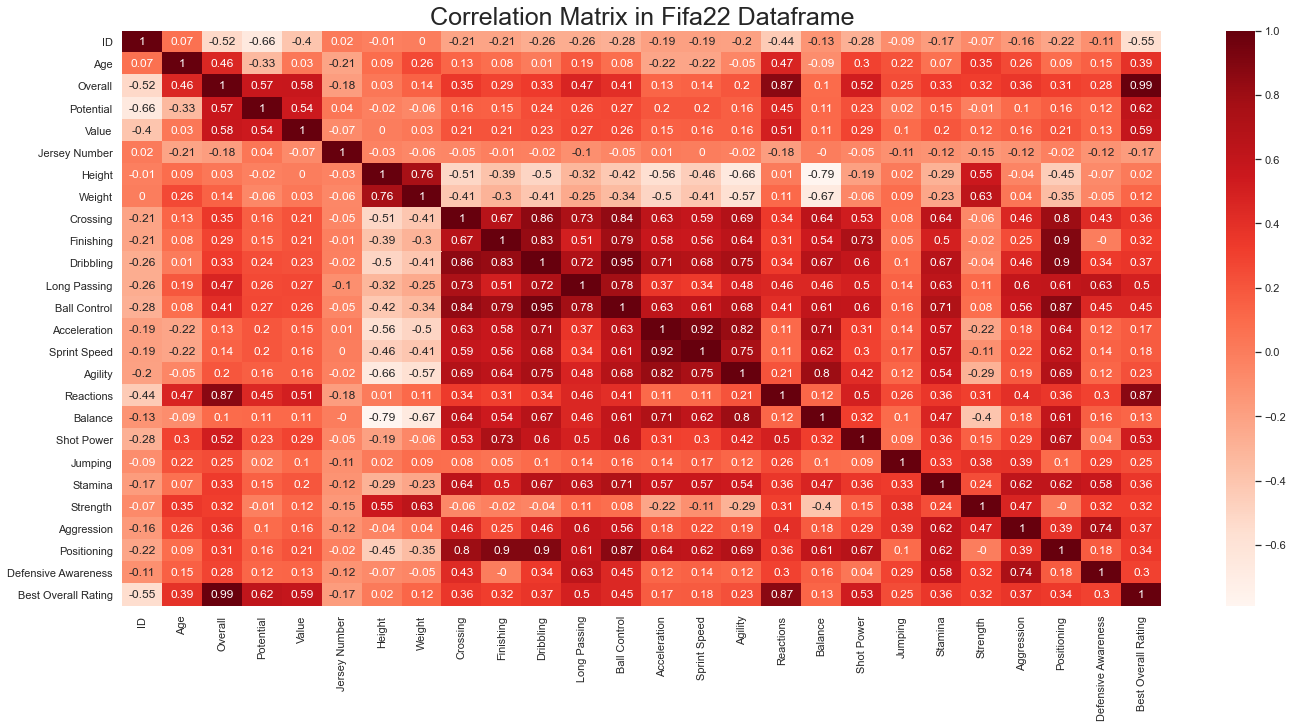

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(round(fifa22_df.corr(),2), annot=True, cmap='Reds')
plt.tight_layout()
plt.title("Correlation Matrix in Fifa22 Dataframe", fontsize = 25)
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Draw a Graph showing top 20 players by Best Overall Rating

In [48]:
fifa22_df_top_20_player = fifa22_df.sort_values(by=['Best Overall Rating'], ascending=False)
fifa22_df_top_20_player = fifa22_df_top_20_player.head(20)
fifa22_df_top_20_player = fifa22_df_top_20_player[["Full_Name", "picture" ,"Best Overall Rating"]]
fifa22_df_top_20_player

,Full_Name,picture,Best Overall Rating
37,Lionel Messi,https://cdn.sofifa.com/players/158/023/22_60.png,93
59,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/22_60.png,92
150,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/22_60.png,92
580,Jan Oblak,https://cdn.sofifa.com/players/200/389/22_60.png,91
186,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/22_60.png,91
283,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/22_60.png,91
41,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/22_60.png,91
452,Manuel Neuer,https://cdn.sofifa.com/players/167/495/22_60.png,90
567,Marc-André ter Stegen,https://cdn.sofifa.com/players/192/448/22_60.png,90
217,Harry Kane,https://cdn.sofifa.com/players/202/126/22_60.png,90


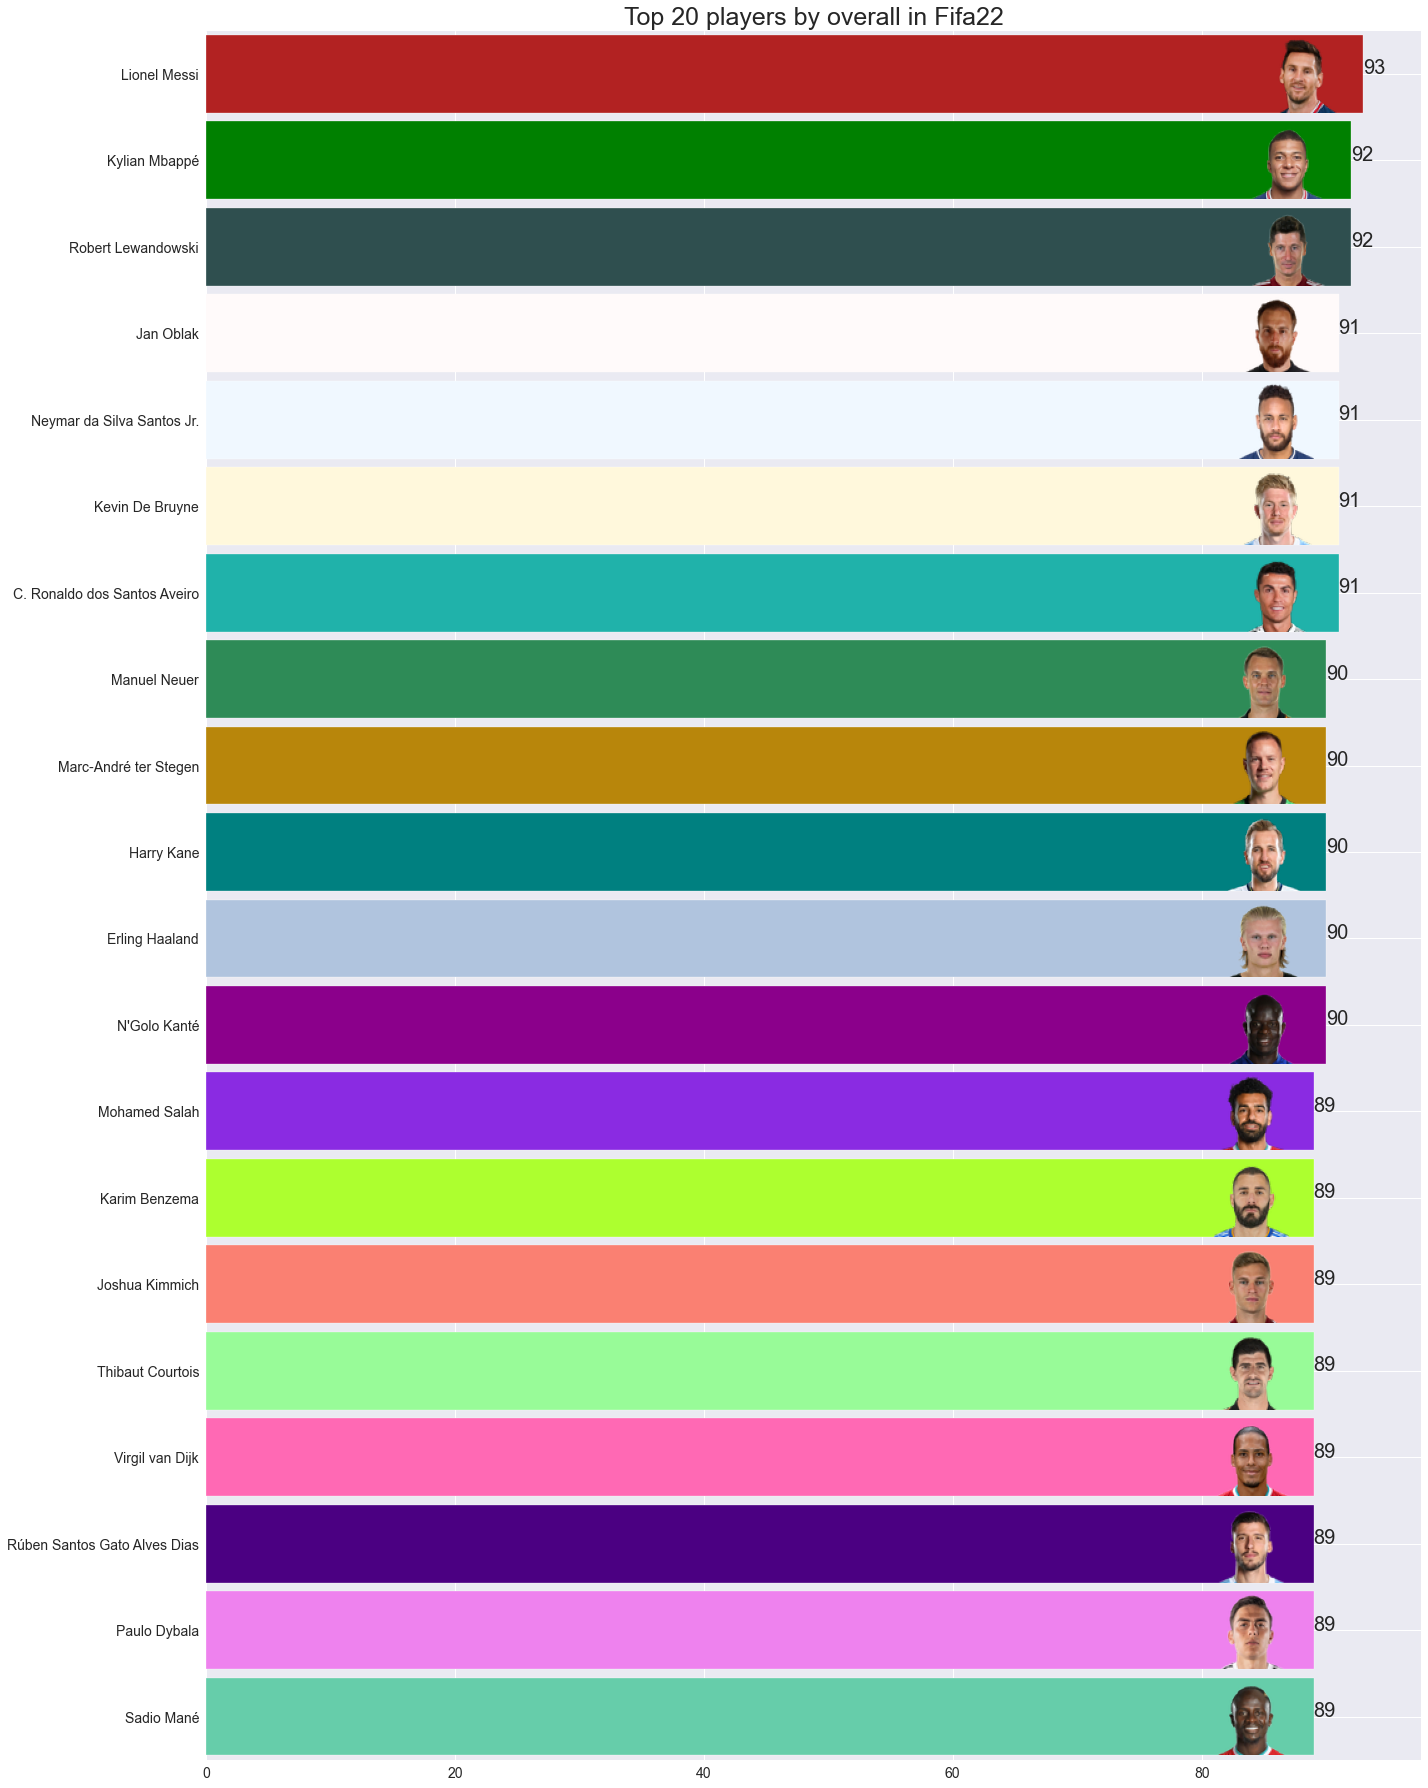

In [49]:
fifa22_df_top_20_player = fifa22_df_top_20_player[::-1]

plt.figure(figsize=(20,25))

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa22_df_top_20_player.size)

plt.style.use('seaborn')

X = [p for p in fifa22_df_top_20_player["Best Overall Rating"]]
Y = [p for p in fifa22_df_top_20_player["Full_Name"]]

liste_pays = [ (i,y) for i,y in zip(fifa22_df_top_20_player["picture"],fifa22_df_top_20_player["Best Overall Rating"])]


height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors, align='center')

for index, value in enumerate(X):
    plt.text(value, index, str(value),fontsize=20)

for i, (label, value) in enumerate(liste_pays):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = plt.imread(BytesIO(r.content))
    #img = plt.imread(r.raw)
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
    
    
plt.xlim(0, max(fifa22_df_top_20_player["Best Overall Rating"]) * 1.05)
plt.ylim(-0.5, len(fifa22_df_top_20_player["Full_Name"]) - 0.5)
plt.title("Top 20 players by overall in Fifa22", fontsize = 25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('images/image3.png', bbox_inches = "tight")
plt.show()

<a id='part4-3'></a>
### 4.3 Draw a Graph showing top 20 team by averange Best Overall Rating

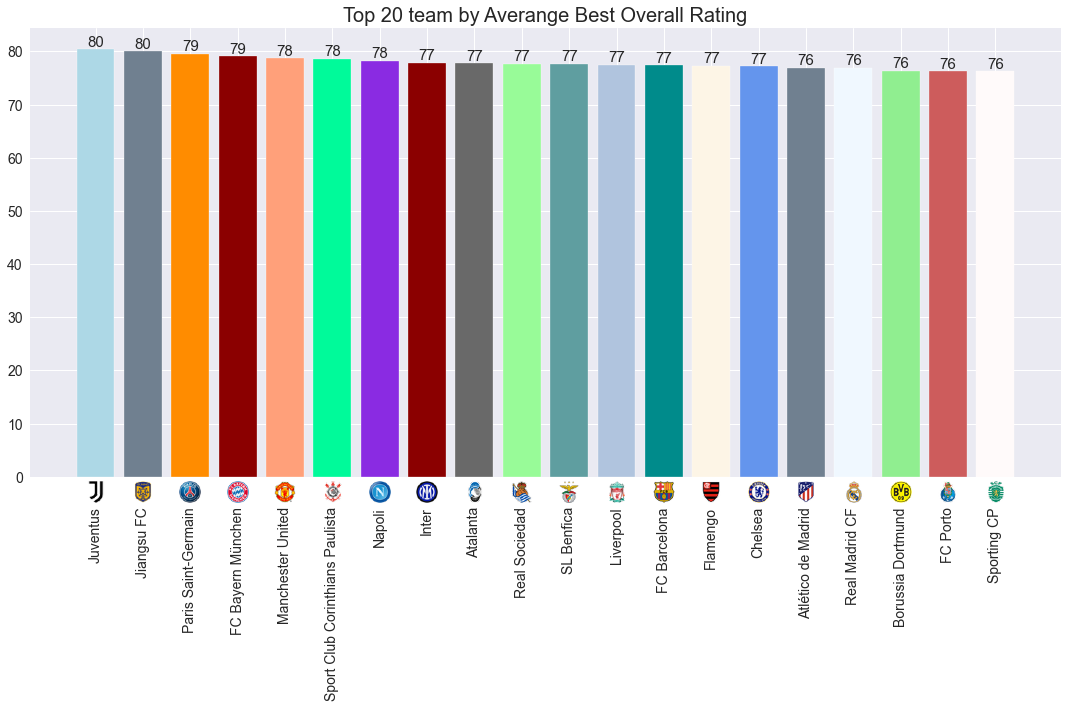

In [50]:
fifa22_df_top_20_team = fifa22_df.groupby(['Team','Team_Image'])['Best Overall Rating'].mean().reset_index()
fifa22_df_top_20_team = fifa22_df_top_20_team.sort_values(by=['Best Overall Rating'], ascending=False)
fifa22_df_top_20_team.reset_index(drop=True, inplace=True)
fifa22_df_top_20_team = fifa22_df_top_20_team.head(20)

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa22_df_top_20_team.size)

plt.figure(figsize=(15,10))

club_logo = np.asarray(fifa22_df_top_20_team["Team_Image"])    

X = [p for p in fifa22_df_top_20_team["Best Overall Rating"]]

bar_plot = plt.bar(range(len(club_logo)), fifa22_df_top_20_team["Best Overall Rating"], color = colors, align='center', width=0.8 )

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',fontsize=15)

plt.gca().set_xticks(range(len(club_logo)))
plt.gca().set_xticklabels(fifa22_df_top_20_team["Team"])
plt.gca().set_title('Top 20 team by Averange Best Overall Rating' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=30)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)

for i, c in enumerate(club_logo):
    offset_image(i, c, plt.gca())

plt.tight_layout()
plt.savefig('images/image4.png', bbox_inches = "tight")
plt.show()

<a id='part4-4'></a>
### 4.4 Draw a Graph showing number of player by their nationalities in World Map

In [51]:
fifa22_df_nationality = pd.DataFrame({'count' : fifa22_df.groupby(['Nationality']).size()}).reset_index()
fifa22_df_nationality = fifa22_df_nationality.sort_values(['count'], ascending = False)
fifa22_df_nationality

,Nationality,count
51,England,1727
63,Germany,1020
148,Spain,1001
59,France,868
6,Argentina,730
...,...,...
138,Saint Lucia,1
16,Belize,1
68,Guam,1
18,Bermuda,1


In [52]:
fifa22_df_nationality['Nationality'] = fifa22_df_nationality['Nationality'].replace('England', 'United Kingdom')

fig = px.choropleth(fifa22_df_nationality, 
                    locations="Nationality", 
                    locationmode='country names', 
                    color="count", 
                    hover_name="Nationality", 
                    color_continuous_scale="YlOrRd",                    
                    title='The number of players with Nationality in World Map in FIFA 2021')

fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
pio.write_image(fig, "images/image5.png") 
fig.show()

<a id='part4-5'></a>
### 4.5 Draw a Figure to show the top 20 number of nationality by the count of player

In [53]:
fifa22_df_nationality_top_20 = fifa22_df.groupby(['Nationality','Flag']).size().reset_index(name="Count")
fifa22_df_nationality_top_20 = fifa22_df_nationality_top_20.sort_values('Count', ascending = False)
fifa22_df_nationality_top_20 = fifa22_df_nationality_top_20.head(20)
fifa22_df_nationality_top_20

,Nationality,Flag,Count
51,England,https://cdn.sofifa.com/flags/gb-eng.png,1727
63,Germany,https://cdn.sofifa.com/flags/de.png,1020
148,Spain,https://cdn.sofifa.com/flags/es.png,1001
59,France,https://cdn.sofifa.com/flags/fr.png,868
6,Argentina,https://cdn.sofifa.com/flags/ar.png,730
22,Brazil,https://cdn.sofifa.com/flags/br.png,649
83,Italy,https://cdn.sofifa.com/flags/it.png,440
115,Netherlands,https://cdn.sofifa.com/flags/nl.png,402
131,Portugal,https://cdn.sofifa.com/flags/pt.png,321
163,United States,https://cdn.sofifa.com/flags/us.png,317


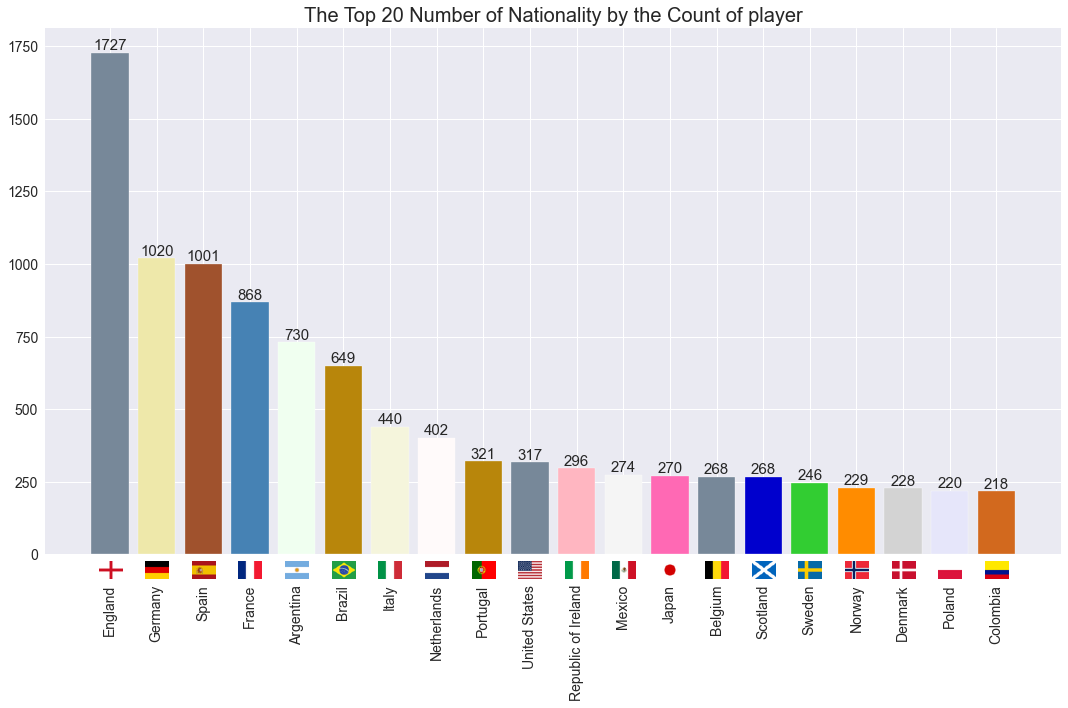

In [54]:
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa22_df_nationality_top_20.size)

plt.figure(figsize=(15,10))

club_logo = np.asarray(fifa22_df_nationality_top_20["Flag"])    

X = [p for p in fifa22_df_nationality_top_20["Count"]]

bar_plot = plt.bar(range(len(club_logo)), fifa22_df_nationality_top_20["Count"], color = colors, align='center', width=0.8 )

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',fontsize=15)

plt.gca().set_xticks(range(len(club_logo)))
plt.gca().set_xticklabels(fifa22_df_nationality_top_20["Nationality"])
plt.gca().set_title('The Top 20 Number of Nationality by the Count of player' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=30)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)

for i, c in enumerate(club_logo):
    offset_image(i, c, plt.gca())

plt.tight_layout()
plt.savefig('images/image6.png', bbox_inches = "tight")
plt.show()

<a id='part4-6'></a>
### 4.6 Draw a Figure to show the top overall 3 player by the features of radar chart

In [55]:
fifa22_df_top_3_player = fifa22_df.sort_values(by=['Best Overall Rating'], ascending=False)
fifa22_df_top_3_player = fifa22_df_top_3_player.head(3)
fifa22_df_top_3_player

,ID,Name,Full_Name,picture,Flag,Age,Position,Overall,Potential,Team_Image,...,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Aggression,Positioning,Defensive Awareness,Best Overall Rating
37,37,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/22_60.png,https://cdn.sofifa.com/flags/ar.png,34,RW,93,93,https://cdn.sofifa.com/teams/73/30.png,...,94.0,95.0,86.0,68.0,72.0,69.0,44.0,93.0,20.0,93
59,59,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/22_60.png,https://cdn.sofifa.com/flags/fr.png,22,ST,91,95,https://cdn.sofifa.com/teams/73/30.png,...,93.0,83.0,86.0,78.0,88.0,77.0,62.0,92.0,26.0,92
150,150,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/22_60.png,https://cdn.sofifa.com/flags/pl.png,32,ST,92,92,https://cdn.sofifa.com/teams/21/30.png,...,93.0,82.0,90.0,85.0,76.0,86.0,81.0,95.0,35.0,92


<ipython-input-39-663fd427fd6d>:26: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-39-663fd427fd6d>:26: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



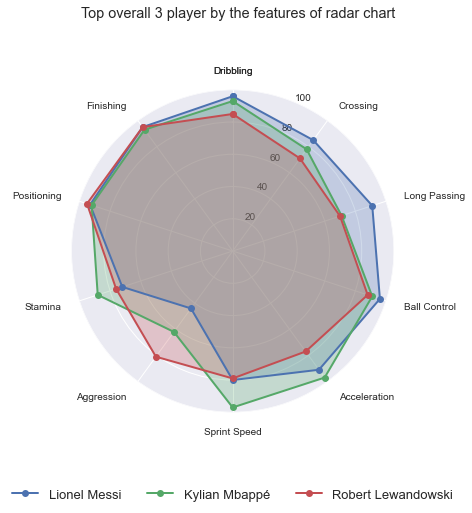

In [56]:
radar_chart(players=fifa22_df_top_3_player["Full_Name"],
           title="Top overall 3 player by the features of radar chart", filename = "images/image7.png")

<a id='part4-7'></a>
### 4.7 Draw a Figure to show the specturum of players' age and Best Overall Rating by their positions

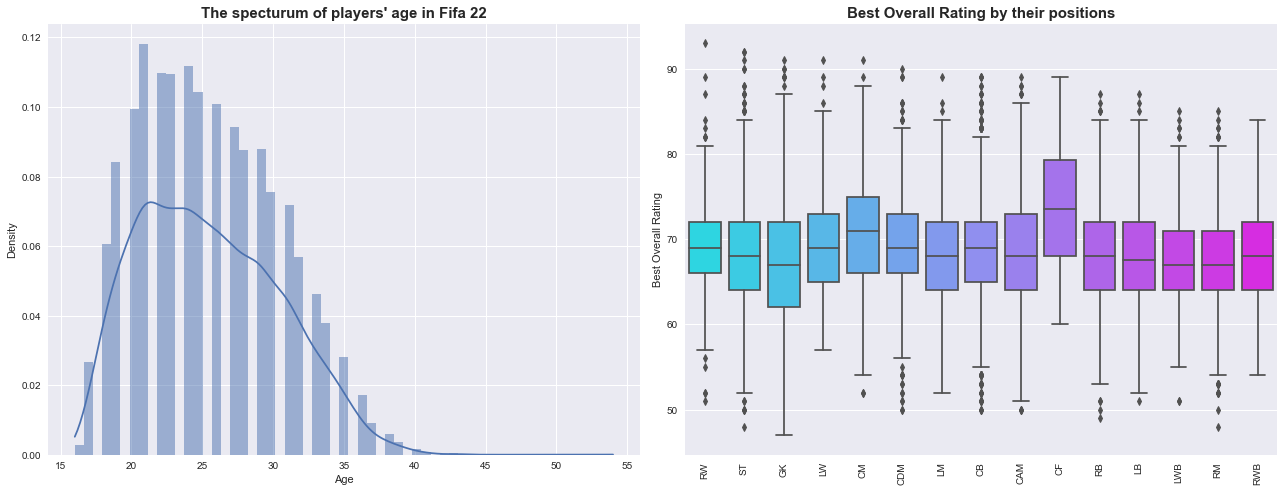

In [57]:
f,a = plt.subplots(1,2,figsize=(18,7))
f.subplots_adjust(wspace = 0.5, hspace=0.4)

sns.histplot(fifa22_df['Age'],
            ax=a[0], kde=True, stat="density", linewidth=0)
a[0].set_title("The specturum of players' age in Fifa 22", fontsize=15, fontweight='bold')

sns.boxplot(data=fifa22_df, x='Best Position' , y='Best Overall Rating',
            ax=a[1], palette='cool')
a[1].set_title("Best Overall Rating by their positions", fontsize=15, fontweight='bold')
a[1].set_xlabel('');
a[1].set_xticklabels(a[1].get_xticklabels(),rotation = 90)

plt.tight_layout()
plt.savefig('images/image8.png', bbox_inches = "tight")
plt.show();

<a id='part4-8'></a>
### 4.8 Draw a Figure to show the top most valuable players

In [58]:
fifa22_df_top_value = fifa22_df.sort_values(by=['Value'], ascending=False)
fifa22_df_top_10_value = fifa22_df_top_value.head(10)
fifa22_df_top_10_value = fifa22_df_top_10_value[["Full_Name", "Age", "Best Position", "Best Overall Rating", "Preferred Foot", "Jersey Number", "Height", "Weight"]]
fifa22_df_top_10_value.rename(columns= {'Height':'Height(cm)', 'Weight': 'Weight(kg)'}, inplace=True)
fifa22_df_top_10_value

,Full_Name,Age,Best Position,Best Overall Rating,Preferred Foot,Jersey Number,Height(cm),Weight(kg)
59,Kylian Mbappé,22,ST,92,Right,7.0,182.0,73.0
18,Erling Haaland,20,ST,90,Left,9.0,194.0,94.0
217,Harry Kane,27,ST,90,Right,10.0,188.0,89.0
186,Neymar da Silva Santos Jr.,29,LW,91,Right,10.0,175.0,68.0
283,Kevin De Bruyne,30,CM,91,Right,17.0,181.0,70.0
202,Gianluigi Donnarumma,22,GK,89,Right,50.0,196.0,90.0
150,Robert Lewandowski,32,ST,92,Right,9.0,185.0,81.0
82,Frenkie de Jong,24,CM,89,Right,21.0,180.0,74.0
80,Jadon Sancho,21,CAM,88,Right,25.0,180.0,76.0
158,Trent Alexander-Arnold,22,RB,87,Right,66.0,180.0,69.0


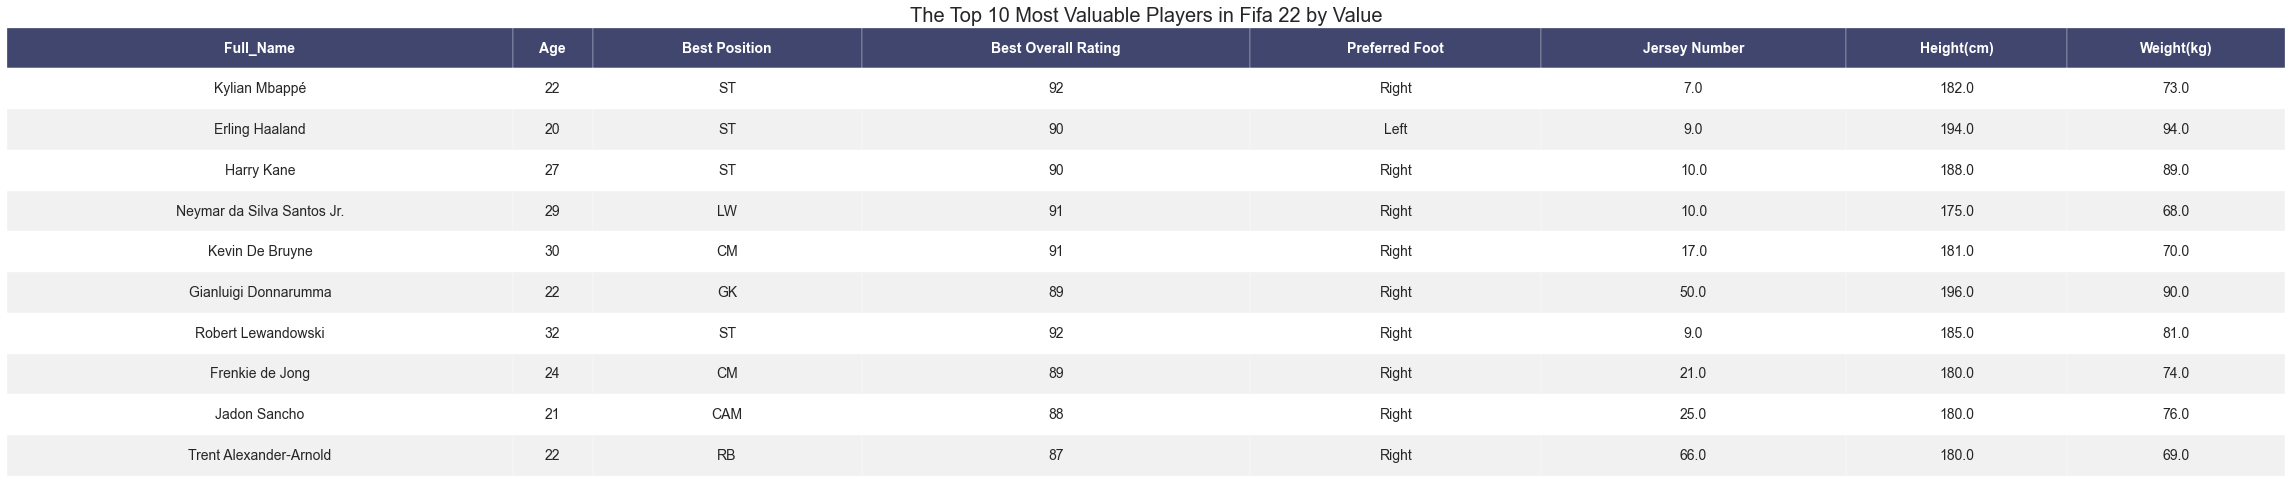

In [59]:
render_mpl_table(fifa22_df_top_10_value,
                 title = "The Top 10 Most Valuable Players in Fifa 22 by Value",
                 header_columns=0,
                 col_width=4.0,
                 image_path = 'images/image9.png')

In [60]:
fifa22_df_top_value = fifa22_df.sort_values(by=['Value'], ascending=False)
fifa22_df_top_3_value = fifa22_df_top_value.head(3)
fifa22_df_top_3_value = fifa22_df_top_3_value[["Full_Name", "picture", "Team_Image" , "Value"]]
fifa22_df_top_3_value

,Full_Name,picture,Team_Image,Value
59,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/22_60.png,https://cdn.sofifa.com/teams/73/30.png,194000000.0
18,Erling Haaland,https://cdn.sofifa.com/players/239/085/22_60.png,https://cdn.sofifa.com/teams/22/30.png,137500000.0
217,Harry Kane,https://cdn.sofifa.com/players/202/126/22_60.png,https://cdn.sofifa.com/teams/18/30.png,129500000.0


In [61]:
fifa22_df_top_3_value['Value'] = (fifa22_df_top_3_value['Value']/1000000).apply(lambda x: '{:,.2f} € M'.format(x))

In [62]:
fifa22_df_top_3_value.index = np.arange(0, len(fifa22_df_top_3_value))

In [63]:
fifa22_df_top_3_value

,Full_Name,picture,Team_Image,Value
0,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/22_60.png,https://cdn.sofifa.com/teams/73/30.png,194.00 € M
1,Erling Haaland,https://cdn.sofifa.com/players/239/085/22_60.png,https://cdn.sofifa.com/teams/22/30.png,137.50 € M
2,Harry Kane,https://cdn.sofifa.com/players/202/126/22_60.png,https://cdn.sofifa.com/teams/18/30.png,129.50 € M


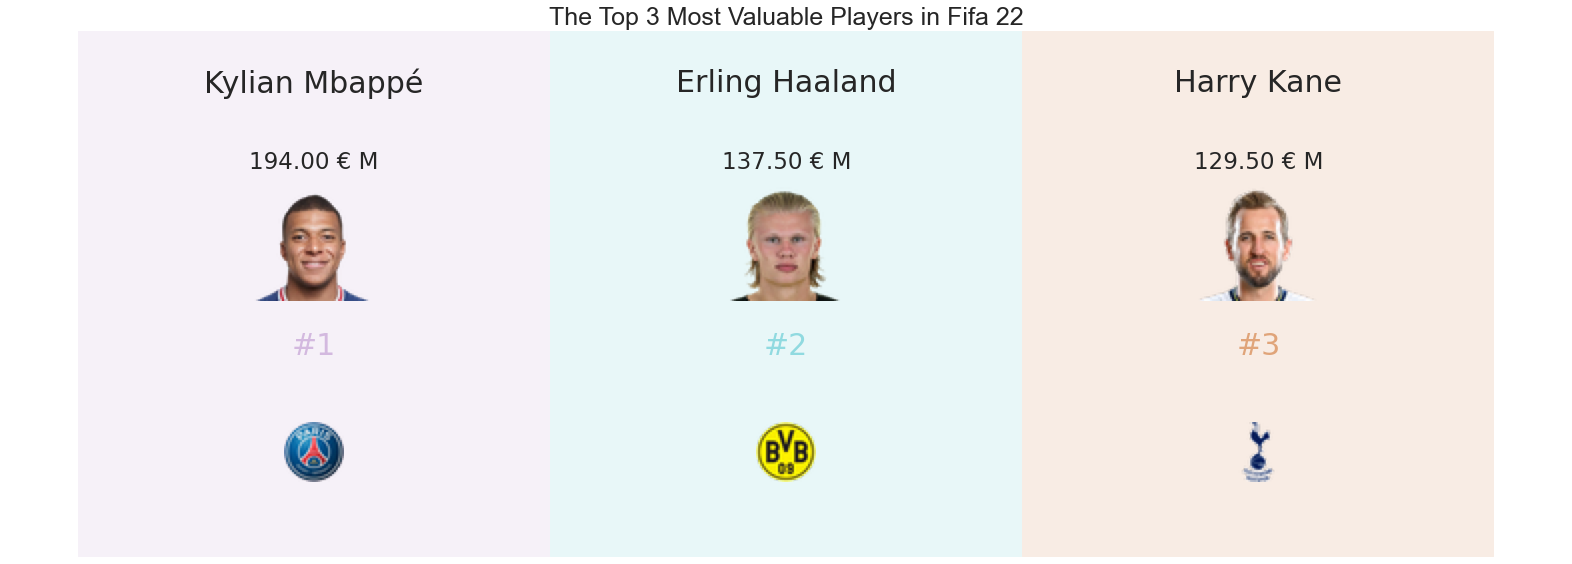

In [64]:
font = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(22,8), facecolor="w")
ax.axvspan(xmin = 0,xmax= 4, ymax= 1, fc='#D3B9DF', alpha=0.2)
ax.axvspan(xmin = 4,xmax= 8, ymax= 1, fc='#90DAE0', alpha=0.2)
ax.axvspan(xmin = 8,xmax= 12, ymax= 1, fc='#E0A479', alpha=0.2)

make_img(fifa22_df_top_3_value.loc[0,'picture'], 2, 2, 0.6)
make_img(fifa22_df_top_3_value.loc[0,'Team_Image'], 2, 2, 0.2)
make_img(fifa22_df_top_3_value.loc[1,'picture'], 2, 6, 0.6)
make_img(fifa22_df_top_3_value.loc[1,'Team_Image'], 2, 6, 0.2)
make_img(fifa22_df_top_3_value.loc[2,'picture'], 2, 10, 0.6)
make_img(fifa22_df_top_3_value.loc[2,'Team_Image'], 2, 10, 0.2)

plt.text(s = fifa22_df_top_3_value.loc[0,'Full_Name'], x= 2, y= 0.90, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = fifa22_df_top_3_value.loc[1,'Full_Name'], x= 6, y=  0.90, va='center', ha='center',font=font, fontsize= 30)
plt.text(s = fifa22_df_top_3_value.loc[2,'Full_Name'], x= 10, y=  0.90, va='center', ha='center',font=font, fontsize= 30)

plt.text(s = fifa22_df_top_3_value.loc[0,'Value'], x= 2, y= 0.75, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = fifa22_df_top_3_value.loc[1,'Value'], x= 6, y= 0.75, va='center', ha='center',font=font, fontsize= 23)
plt.text(s = fifa22_df_top_3_value.loc[2,'Value'], x= 10, y= 0.75, va='center', ha='center',font=font, fontsize= 23)

plt.text(s = "#1", x= 2, y= 0.4, va='center', ha='center',font=font, fontsize= 30,color ='#D3B9DF')
plt.text(s = "#2", x= 6, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color='#90DAE0')
plt.text(s = "#3", x= 10, y= 0.4, va='center', ha='center',font=font, fontsize= 30, color ='#E0A479')

plt.axis('off')
plt.title("The Top 3 Most Valuable Players in Fifa 22", fontsize = 25)
plt.tight_layout()
plt.savefig('images/image10.png', bbox_inches = "tight")
plt.show()

<a id='part4-9'></a>
### 4.9 Define a nested pie graph to determine which prefered feet were used from players in terms of their position

In [65]:
fifa22_df_preferred_feet_position = pd.DataFrame({'count' : fifa22_df.groupby(['Best Position','Preferred Foot']).size()}).reset_index()
fifa22_df_preferred_feet_position = fifa22_df_preferred_feet_position.sort_values(['count'], ascending = False)

fifa22_df_preferred_feet_position_outer = fifa22_df_preferred_feet_position.groupby('Preferred Foot').sum()
fifa22_df_preferred_feet_position_inner = fifa22_df_preferred_feet_position.groupby(['Preferred Foot', 'Best Position']).sum()
fifa22_df_preferred_feet_position_inner_labels = fifa22_df_preferred_feet_position_inner.index.get_level_values(1)

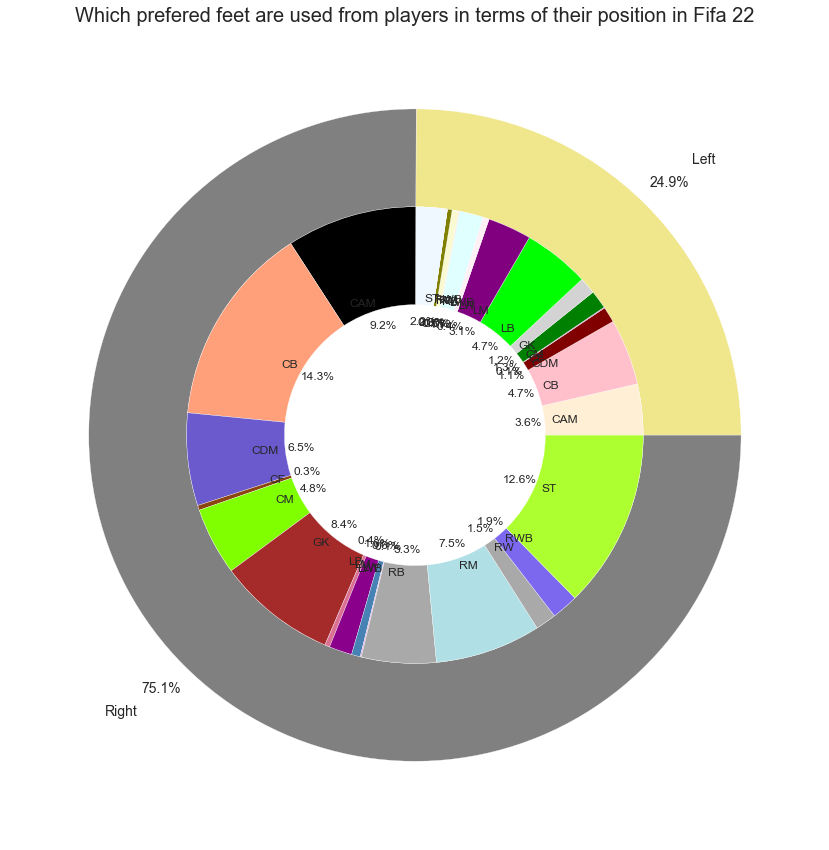

In [66]:
drawnestedpiegraph(fifa22_df_preferred_feet_position_outer,
                   fifa22_df_preferred_feet_position_inner,
                   fifa22_df_preferred_feet_position_inner_labels,
                   "Which prefered feet are used from players in terms of their position in Fifa 22",
                   "image11.png")

<a id='part4-10'></a>
### 4.10 Draw WorldCloud showing all players' names

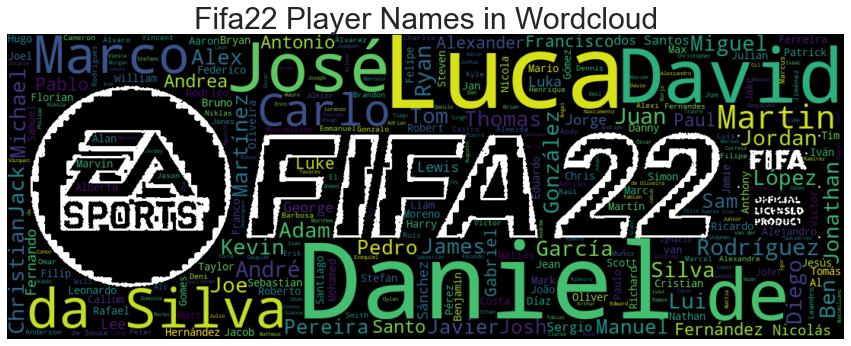

In [68]:
plt.figure(figsize=[15, 15])

image = Image.open("images/fifa22.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(fifa22_df['Full_Name']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fifa22 Player Names in Wordcloud', fontsize=30)
plt.savefig('images/image12.png')
plt.show()